*Kuliah TA 1 dan TA 2*, 23 September 2022

oleh:

*Muhamad Irfan Hakim*

# DataFrame and Series

Analogi **DataFrame** adalah dengan *tabel* atau *worksheet* di Excel

Analogi **Series** adalah dengan *kolom* di suatu tabel

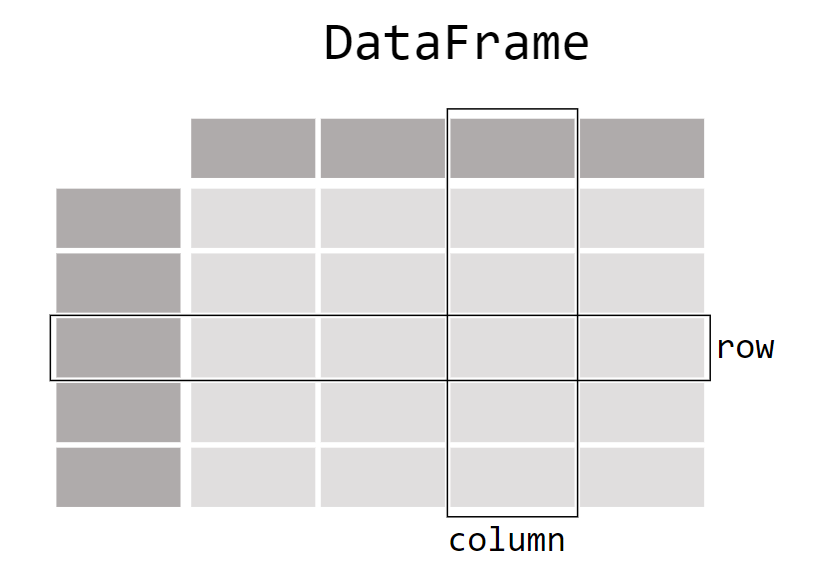

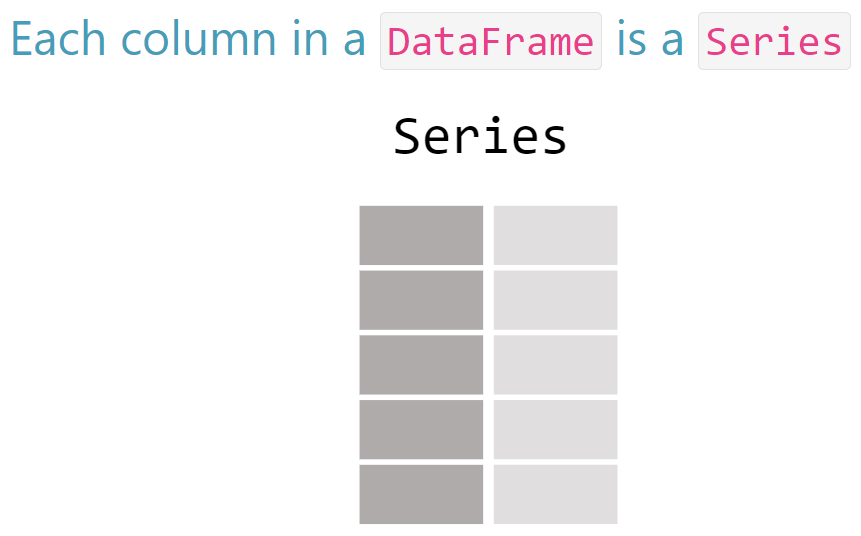

# DataFrame type of file(s)

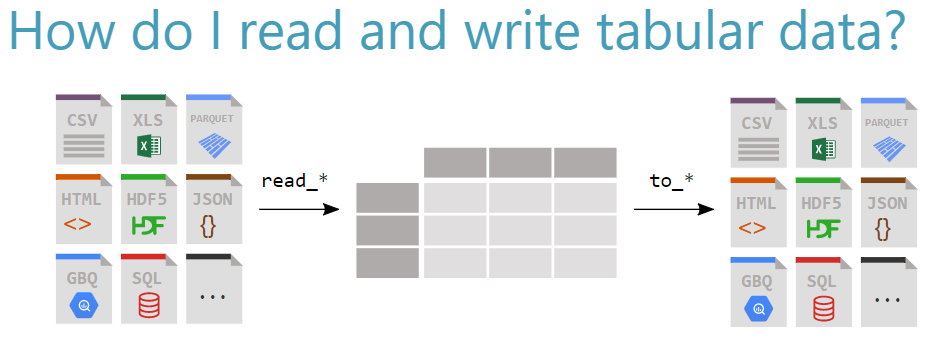

# Select a subset (row or column) of a DataFrame to create a new table

## Select specific columns

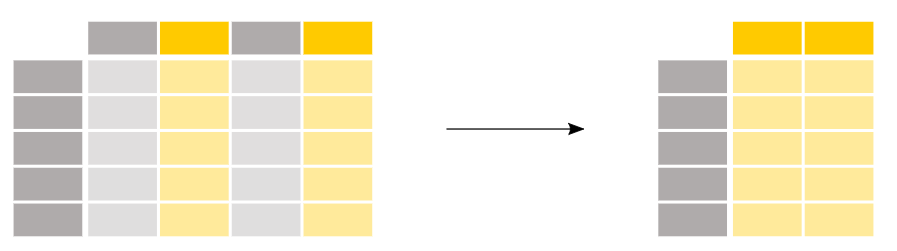

## Select specific rows

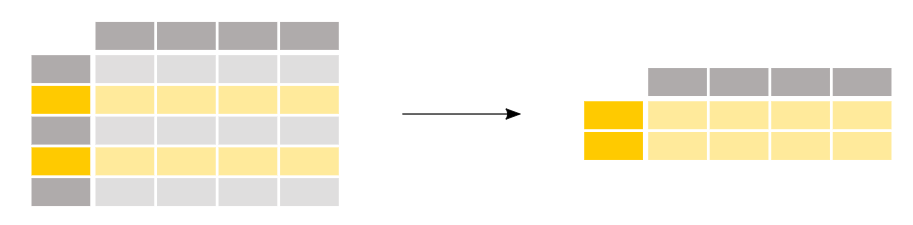

## Select specific rows and columns

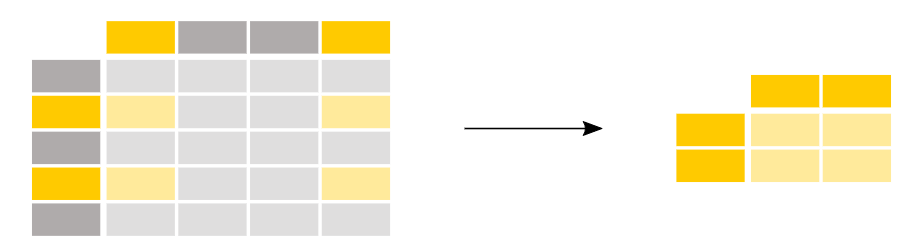



In [1]:
import pandas as pd

# Ingat kembali konsep ***dict (dictionary)***

In [2]:
A = ({1: ["1", "2"]})
type(A)

dict

In [3]:
df = pd.DataFrame(
    {
        "Nama": [
            "Soekarno",
            "Suharto",
            "Habibie",
            "Megawati",
        ],
        "Usia": [22, 35, 58, 54],
        "Jenis kelamin": ["L", "L", "L", "P"],
    }
)

## Tipe data df tidak persis seperti dict

#### Namun, pendefinisian entry setiap kolom mengikuti pola penulisan *dict*

In [4]:
type(df)

pandas.core.frame.DataFrame

## Salah satu fitur (***Usia***) di dataset adalah numerik

In [5]:
df

,Nama,Usia,Jenis kelamin
0,Soekarno,22,L
1,Suharto,35,L
2,Habibie,58,L
3,Megawati,54,P


In [6]:
df["Usia"]

0    22
1    35
2    58
3    54
Name: Usia, dtype: int64

In [7]:
df["Nama"]

0    Soekarno
1     Suharto
2     Habibie
3    Megawati
Name: Nama, dtype: object

## Operasi pada kolom ***Usia*** dapat dilakukan

In [8]:
df["Usia"].max()

58

In [9]:
df["Usia"].min()

22

In [10]:
df["Usia"].mean()

42.25

## Statistik sederhana dari dataset dapat dikeluarkan

In [11]:
df.describe()

,Usia
count,4.000000
mean,42.250000
std,16.820127
min,22.000000
25%,31.750000
50%,44.500000
75%,55.000000
max,58.000000


In [12]:
from google.colab import files

In [16]:
!ls -F

sample_data/


In [17]:
upFile = files.upload()

Saving penumpang.xlsx to penumpang.xlsx


In [18]:
penumpang = pd.read_excel("penumpang.xlsx")

## Dataframe belum bersih dari datapoint bermasalah

#### Perlu *preprocessing*

In [19]:
penumpang

,KodePnmpng,CheckIn,Kelas,Tarif,Bagasi
0,A101,Y,"""1""",10,Y
1,A102,Y,"""3""",43,T
2,A103,Y,"""2""",23,Y
3,A104,Y,"""1""",15,Y
4,A105,Y,"""2""",25,T
5,A106,NaN,"""3""",50,NaN
6,A107,Y,"""3""",51,Y
7,A108,Y,"""3""",53,Y
8,A109,Y,"""1""",9,T
9,A110,Y,"""1""",11,Y


In [20]:
type(penumpang)

pandas.core.frame.DataFrame

In [21]:
penumpang.dtypes

KodePnmpng    object
CheckIn       object
Kelas         object
Tarif          int64
Bagasi        object
dtype: object

In [22]:
penumpang.to_csv('penumpang.csv')

In [23]:
!ls -lh penumpang.*

-rw-r--r-- 1 root root  256 Sep 23 06:26 penumpang.csv
-rw-r--r-- 1 root root 9.1K Sep 23 06:26 penumpang.xlsx


In [24]:
penumpang.describe()

,Tarif
count,10.000000
mean,29.000000
std,18.348479
min,9.000000
25%,12.000000
50%,24.000000
75%,48.250000
max,53.000000


In [25]:
penumpang.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   KodePnmpng  10 non-null     object
 1   CheckIn     9 non-null      object
 2   Kelas       10 non-null     object
 3   Tarif       10 non-null     int64 
 4   Bagasi      9 non-null      object
dtypes: int64(1), object(4)
memory usage: 528.0+ bytes


In [26]:
penumpang["CheckIn"].shape

(10,)

In [27]:
kode = penumpang["KodePnmpng"]

In [28]:
kode

0    A101
1    A102
2    A103
3    A104
4    A105
5    A106
6    A107
7    A108
8    A109
9    A110
Name: KodePnmpng, dtype: object

In [29]:
kode_kelas = penumpang[["KodePnmpng", "Kelas"]]

In [30]:
kode_kelas

,KodePnmpng,Kelas
0,A101,"""1"""
1,A102,"""3"""
2,A103,"""2"""
3,A104,"""1"""
4,A105,"""2"""
5,A106,"""3"""
6,A107,"""3"""
7,A108,"""3"""
8,A109,"""1"""
9,A110,"""1"""


In [31]:
kode_kelas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   KodePnmpng  10 non-null     object
 1   Kelas       10 non-null     object
dtypes: object(2)
memory usage: 288.0+ bytes


In [32]:
# 'Series' object has no attribute 'info'

kode.info()

AttributeError: ignored

# kode_kelas sebagai dataset (tanpa fitur numerik) dapat juga dikeluarkan statistiknya

In [33]:
kode_kelas.describe()

,KodePnmpng,Kelas
count,10,10
unique,10,3
top,A101,"""1"""
freq,1,4


In [34]:
kode_tarif = penumpang[["KodePnmpng", "Tarif"]]

In [35]:
kode_tarif

,KodePnmpng,Tarif
0,A101,10
1,A102,43
2,A103,23
3,A104,15
4,A105,25
5,A106,50
6,A107,51
7,A108,53
8,A109,9
9,A110,11


In [36]:
kode_tarif.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   KodePnmpng  10 non-null     object
 1   Tarif       10 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 288.0+ bytes


In [37]:
kode_tarif.describe()

,Tarif
count,10.000000
mean,29.000000
std,18.348479
min,9.000000
25%,12.000000
50%,24.000000
75%,48.250000
max,53.000000


In [78]:
import matplotlib.pyplot as plt

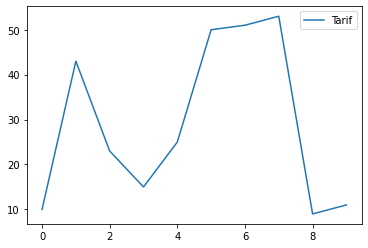

In [79]:
kode_tarif.plot()

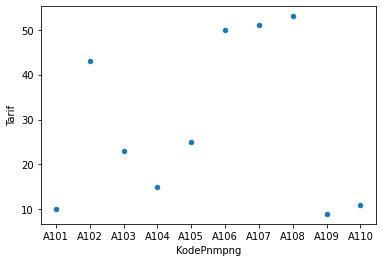

In [83]:
kode_tarif.plot.scatter(x="KodePnmpng", y="Tarif")